In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('C:\\Users\\admin\\Desktop\\MACHINE_LEARNING_CODES\\ML_PROJECT\\notebook\\data\\StudentsPerformance.csv')

In [4]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [5]:
df.shape

(1000, 8)

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
df.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [11]:
#define numerical and categorical features
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print("numeric_features:",numeric_features)
print("ctegorical_features:",categorical_features)

numeric_features: ['math score', 'reading score', 'writing score']
ctegorical_features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [12]:
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['Average_score']=df['total_score']/3
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score  Average_score  
0          218      72.666667  
1          247      82.333333  
2          278      92.666667  
3          148      49.333333  
4          229      76.333333

In [13]:
reading_full=df[df['reading score']==100]['Average_score'].count()
writing_full=df[df['writing score']==100]['Average_score'].count()
math_full=df[df['math score']==100]['Average_score'].count()
print("Number of students with full marks in reading:",reading_full)
print("Number of students with full marks in writing:",writing_full)
print("Number of students with full marks in math:",math_full)

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in math: 7


In [14]:
reading_full=df[df['reading score']<=20]['Average_score'].count()
writing_full=df[df['writing score']<=20]['Average_score'].count()
math_full=df[df['math score']<=20]['Average_score'].count()
print("Number of students with less than 20 marks in reading:",reading_full)
print("Number of students with less than 20 marks in writing:",writing_full)        
print("Number of students with less than 20 marks in math:",math_full)

Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in math: 4


<Axes: xlabel='Average_score', ylabel='Count'>

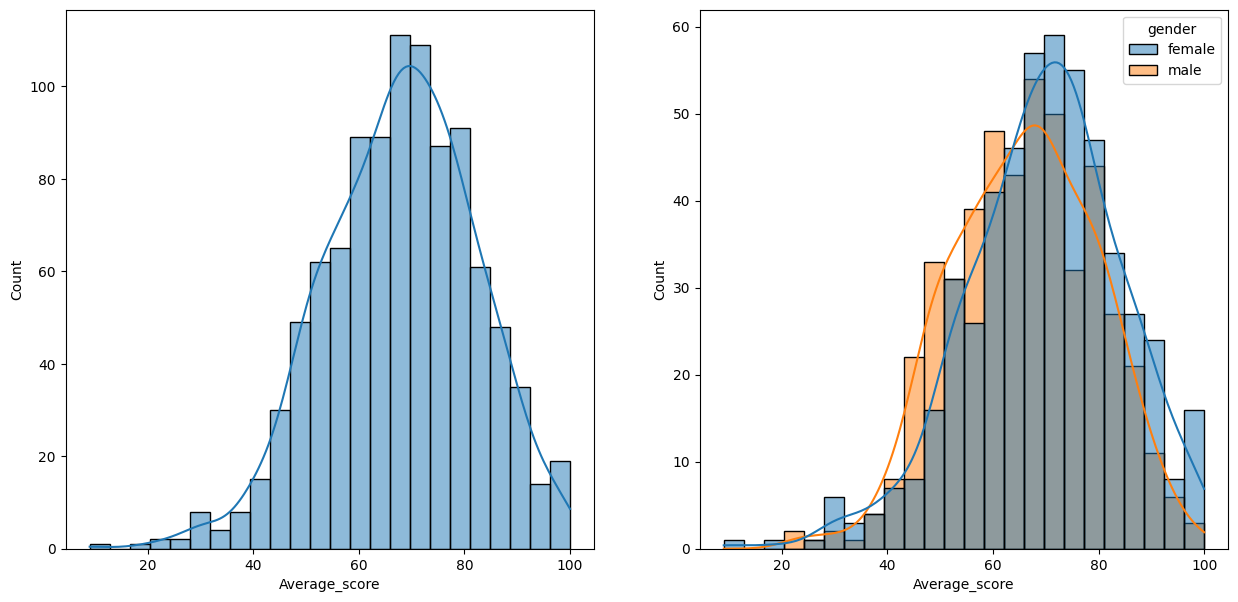

In [15]:
#histogram and kde
fig,axes=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average_score',kde=True)
plt.subplot(122)
sns.histplot(data=df,x='Average_score',kde=True,hue="gender")

In [16]:
df

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72             74   
1                 completed          69             90             88   
2                      none          90             95             93   
3                      none          47             57             44   
4                      none          76             78             75   
..                      ...         ...            ...            ...   
995               completed          88             99             95   
996                    none          62             55             55   
997               completed          59             71             65   
998               completed          68             78             77   
999                    none          77             86             86   

     total_score  Average_score  
0            218      72.666667  
1            247      82.333333  
2            278      92.666667  
3            148      49.333333  
4            229      76.333333  
..           ...            ...  
995          282      94.000000  
996          172      57.333333  
997          195      65.000000  
998          223      74.333333  
999          249      83.000000  

[1000 rows x 10 columns]

In [23]:
df.to_csv('C:\\Users\\admin\\Desktop\\MACHINE_LEARNING_CODES\\ML_PROJECT\\notebook\\data\\StudentsPerformance1.csv   ', mode='a', header=True, index=False)

In [18]:
df


gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72             74   
1                 completed          69             90             88   
2                      none          90             95             93   
3                      none          47             57             44   
4                      none          76             78             75   
..                      ...         ...            ...            ...   
995               completed          88             99             95   
996                    none          62             55             55   
997               completed          59             71             65   
998               completed          68             78             77   
999                    none          77             86             86   

     total_score  Average_score  
0            218      72.666667  
1            247      82.333333  
2            278      92.666667  
3            148      49.333333  
4            229      76.333333  
..           ...            ...  
995          282      94.000000  
996          172      57.333333  
997          195      65.000000  
998          223      74.333333  
999          249      83.000000  

[1000 rows x 10 columns]